In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
with h5py.File("./out/test.hdf5") as data:
    print(data.keys())
    print(data.attrs["header"])
    print(data.attrs["header_dim"])
    deg1 = np.array(data['joint1'])
    deg2 = np.array(data['joint2'])
    header = data.attrs["header"]
    header_dim = data.attrs["header_dim"]
    legend = []
    for i,key in enumerate(header):
        for j in range(header_dim[i]):
            legend.append(key+str(j))


<KeysViewHDF5 ['finger1', 'finger2', 'joint1', 'joint2', 'joint3', 'joint4', 'joint5', 'joint6', 'joint7', 'nodeg']>
['current_time' 'robot0_eef_quat' 'robot0_effort' 'robot0_eef_pos'
 'cube_quat' 'robot0_gripper_qvel' 'robot0_gripper_qpos'
 'robot0_joint_pos' 'cube_pos' 'robot0_joint_vel']
[1 4 7 3 4 2 2 7 3 7]


In [3]:
df1 = pd.DataFrame(deg1, columns=legend)
df2 = pd.DataFrame(deg2, columns=legend)
df1.head()

,current_time0,robot0_eef_quat0,robot0_eef_quat1,robot0_eef_quat2,robot0_eef_quat3,robot0_effort0,robot0_effort1,robot0_effort2,robot0_effort3,robot0_effort4,...,cube_pos0,cube_pos1,cube_pos2,robot0_joint_vel0,robot0_joint_vel1,robot0_joint_vel2,robot0_joint_vel3,robot0_joint_vel4,robot0_joint_vel5,robot0_joint_vel6
0,0.05,0.997467,-0.018468,0.068638,0.002564,-23.262597,53.735046,-57.916311,57.561830,23.266282,...,0.000000e+00,0.000000e+00,0.828456,-0.149489,1.503951,-0.924257,1.678762,0.226752,0.227162,0.116925
1,0.10,0.995476,-0.054750,0.076906,0.010767,11.545084,-37.152779,-7.026738,18.616199,25.101392,...,6.241410e-22,1.497450e-21,0.827344,0.028127,1.886976,-1.018633,2.272097,0.688314,-0.196845,-0.037662
2,0.15,0.992614,-0.091245,0.077993,0.017549,8.680083,-61.804772,-7.459953,7.463738,22.075340,...,8.189970e-23,1.960971e-21,0.828634,0.202930,1.579112,-0.882573,2.179977,1.189231,-0.791297,-0.162715
3,0.20,0.989139,-0.126864,0.071767,0.018942,2.836917,-59.578158,-10.447470,3.604184,17.666157,...,4.175314e-22,3.588325e-21,0.829247,0.333859,1.183336,-0.832987,1.898116,1.504477,-1.222613,-0.256674
4,0.25,0.984933,-0.161059,0.061344,0.014280,-2.128040,-50.896020,-10.114016,1.226263,14.064649,...,2.910500e-22,7.880482e-21,0.829524,0.417444,0.878871,-0.826291,1.576452,1.657289,-1.384982,-0.294600


<AxesSubplot: xlabel='current_time0'>

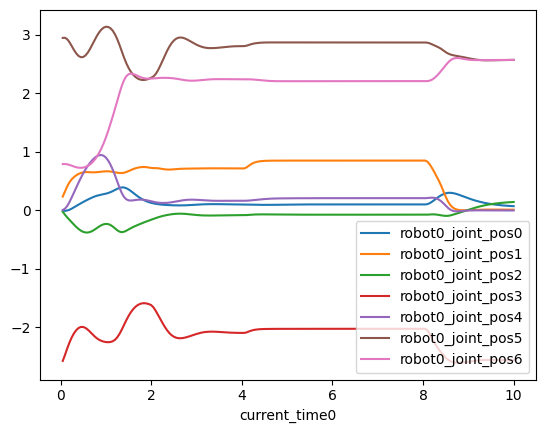

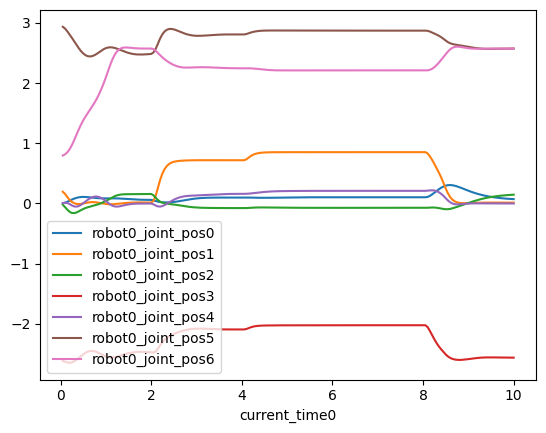

In [4]:
df1.plot(x='current_time0', y=['robot0_joint_pos0','robot0_joint_pos1','robot0_joint_pos2','robot0_joint_pos3','robot0_joint_pos4','robot0_joint_pos5','robot0_joint_pos6'])
df2.plot(x='current_time0', y=['robot0_joint_pos0','robot0_joint_pos1','robot0_joint_pos2','robot0_joint_pos3','robot0_joint_pos4','robot0_joint_pos5','robot0_joint_pos6'])

(-20.0, 20.0)

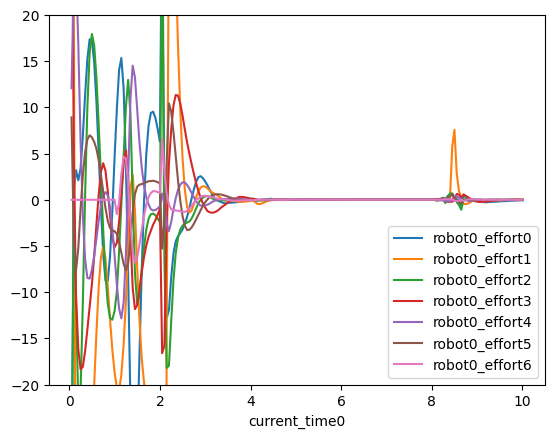

In [5]:
dfout = df1-df2
dfout = dfout.drop(columns="current_time0")
dfout = pd.concat((dfout, df1["current_time0"]), axis=1)
dfout.plot(x='current_time0', y=['robot0_effort0','robot0_effort1','robot0_effort2','robot0_effort3','robot0_effort4','robot0_effort5','robot0_effort6'])
plt.ylim(-20,20)